In [60]:
import random
import simpy
import matplotlib.pyplot as plt

In [19]:
SEED = 9999
random.seed(SEED)

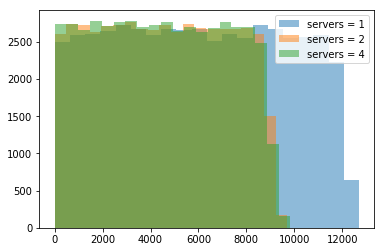

In [65]:
class Source(object):
    ''' Generate the customers comming into the system with some exponetially distributed interval time.
    '''
    def __init__(self, env, numCustomers, interval, serveTime, server):
        self.env = env
        self.numCustomers = numCustomers
        self.interval = interval
        self.serveTime = serveTime
        self.server = server
        self.action = env.process(self.run())
    
    def run(self):
        ''' Create n customers and timeout after each creation
        '''
        for i in range(1, self.numCustomers+1):
            customer = Customer(self.env, i, self.server, self.serveTime)
            timeUntillNext = random.expovariate(1. / self.interval)
            yield self.env.timeout(timeUntillNext)

class Customer(object):
    ''' Customers request the passed resource if they can make use of an open service.
        They are then served which takes some exponentially distributed time.
    '''
    def __init__(self, env, number, server, serveTime):
        self.env = env
        self.number = number
        self.server = server
        self.serveTime = serveTime
        self.action = env.process(self.run())
    
    def run(self):
        ''' Create a service request and use it once it becomes available
        '''
#         print('customer %d starts at %d' % (self.number, self.env.now))
        with self.server.request() as req:
            yield req
#             print('customer %d served at %d' % (self.number, self.env.now))
            yield self.env.timeout(random.expovariate(1./self.serveTime))
            results.append(self.env.now)
#             print('customer %d done at %d' % (self.number, self.env.now))

CUSTOMERS = 1000
CAPACITY = [1,2,4]
REPS = 50
plt.figure()
for cap in CAPACITY:
    tot
    for _ in range(REPS):
        results = []
        MU = 12.0
        LAMBDA = 9.
        # MU = LAMBDA / CAPACITY + .1
        env = simpy.Environment()
        server = simpy.Resource(env, capacity=cap)
        source = Source(env, CUSTOMERS, LAMBDA, MU, server)
        env.run()
    plt.hist(results, bins=20, alpha=0.5, label="servers = " + str(cap))

plt.legend()
plt.show()